<a href="https://colab.research.google.com/github/kurihara-ryo/cesarean-pasaran/blob/main/%5B%E8%A7%A3%E7%AD%94%5D%E7%99%BA%E5%B1%95%E8%AA%B2%E9%A1%8C_%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E2%85%A2_0910.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習データクリーニング発展課題
【課題】と書いてあるセルでは、自分でプログラムを作成してください。

1. 実行ボタンを押してプログラムの動作確認を行い、Google Classroomから提出してください。
2. 提出する際は、コメント(#から始まる部分)を削除せずに残してください。
3. 〆切が近いので、後回しにせず講義時間中に手を動かしてプログラムを作成すること。

In [ ]:
!apt-get -y install fonts-ipafont-gothic
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAPGothic'
japanize_matplotlib.japanize()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 5s (1,788 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

## 問題1: Ridge/Lasso正則化による特徴選択 (Titanic)
Titanicデータを用いて、欠損補完やカテゴリ変換後にロジスティック回帰のL1/L2正則化を比較し、特徴量の選択効果を確認します。

### ステップ0: データ読み込みと確認

In [ ]:
"""
TitanicデータセットをSeabornから読み込み、最初の数行を表示します。
このデータは、1912年に沈没したタイタニック号の乗客情報で、生存/死亡を予測する分類問題に利用されます。
"""

import pandas as pd
import seaborn as sns

# Titanicデータの読み込み
df = sns.load_dataset('titanic')

# 最初の5行を確認
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 【課題】ステップ1: 基本的なデータクレンジング（列選択・欠損処理）

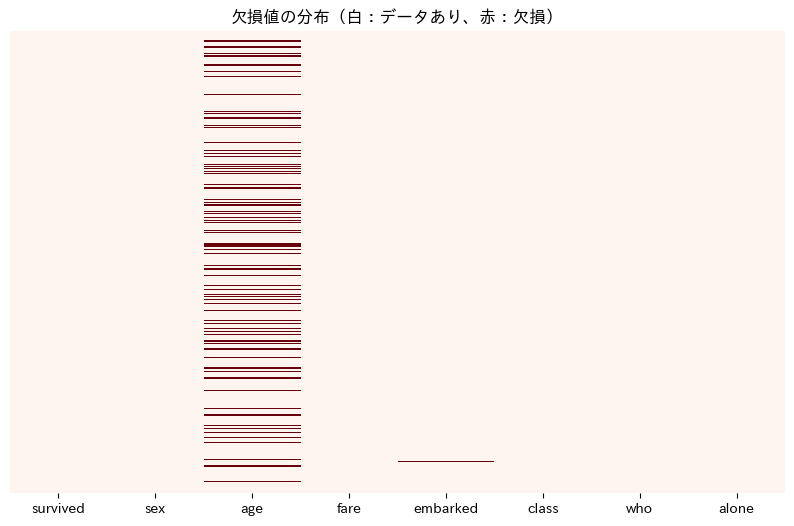

補完後の欠損数：
survived    0
sex         0
age         0
fare        0
embarked    0
class       0
who         0
alone       0
dtype: int64


In [ ]:
"""
このセルでは、以下の前処理を行います：

1. モデルに必要な列だけを選び、DataFrameを安全にコピー
2. 欠損値の分布をheatmapで可視化（どの列に欠損があるか直感的に把握）
3. 数値列（age）は中央値で、カテゴリ列（embarked）は最頻値で補完
"""

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# 使用する列のみ抽出して、安全なコピーを作成
df = df[['survived', 'sex', 'age', 'fare', 'embarked', 'class', 'who', 'alone']].copy()

# 欠損の可視化：True=欠損, False=データあり
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds", yticklabels=False)
plt.title('欠損値の分布（白：データあり、赤：欠損）')
plt.show()

# 数値列（age）の中央値補完
imp_num = SimpleImputer(strategy='median')
df[['age']] = imp_num.fit_transform(df[['age']])

# カテゴリ列（embarked）の最頻値補完
imp_cat = SimpleImputer(strategy='most_frequent')
df[['embarked']] = imp_cat.fit_transform(df[['embarked']])

# 補完後の確認
print("補完後の欠損数：")
print(df.isnull().sum())


### 【課題】ステップ2: カテゴリ変数の変換（One-Hot Encoding）

In [ ]:
"""
文字列カテゴリを機械学習用に変換します。'sex', 'embarked', 'class', 'who', 'alone' などの
カテゴリ列は、One-Hotエンコーディングによって0/1の数値列に変換します。
"""

# One-Hotエンコーディング（drop_first=Trueでダミー変数の多重共線性を防ぐ）
df_encoded = pd.get_dummies(df, drop_first=True, dtype=int)

# 確認
df_encoded.head()


,survived,age,fare,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman
0,0,22.0,7.2500,False,1,0,1,0,1,1,0
1,1,38.0,71.2833,False,0,0,0,0,0,0,1
2,1,26.0,7.9250,True,0,0,1,0,1,0,1
3,1,35.0,53.1000,False,0,0,1,0,0,0,1
4,0,35.0,8.0500,True,1,0,1,0,1,1,0


### ステップ3: 特徴量と目的変数の分離

In [ ]:
"""
目的変数（生存=1, 死亡=0）をy、説明変数（乗客属性）をXに分けます。
"""

X = df_encoded.drop(columns='survived')
y = df_encoded['survived']


### 【課題】ステップ4: 標準化と訓練データ・テストデータへの分割

In [ ]:
"""
ロジスティック回帰に備えて、数値特徴量を標準化（平均0、標準偏差1に）します。
その後、学習用と評価用にデータを分割します。
"""

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 【課題】ステップ5: L1（Lasso）とL2（Ridge）正則化ロジスティック回帰の比較

In [ ]:
"""
【目的】
このコードでは、Titanicデータセットを使ってロジスティック回帰モデルを構築し、
L1正則化（Lasso）とL2正則化（Ridge）の予測精度（accuracy）を比較します。

【流れ】
1. データの読み込みと前処理（欠損補完、カテゴリ変数のOne-Hotエンコーディングなど）
2. 説明変数と目的変数の分離、および標準化
3. L1・L2ロジスティック回帰をそれぞれ学習（C=0.1）
4. テストデータに対する精度（accuracy）を出力して比較
"""

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# L1正則化（Lasso） with C=0.1
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, random_state=42)
model_l1.fit(X_train_scaled, y_train)
y_pred_l1 = model_l1.predict(X_test_scaled)
acc_l1 = accuracy_score(y_test, y_pred_l1)

# L2正則化（Ridge） with C=0.1
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=0.1, random_state=42)
model_l2.fit(X_train_scaled, y_train)
y_pred_l2 = model_l2.predict(X_test_scaled)
acc_l2 = accuracy_score(y_test, y_pred_l2)

# 精度の出力（小数第3位まで表示）
print(f"L1正則化（C=0.1）の accuracy: {acc_l1:.3f}")
print(f"L2正則化（C=0.1）の accuracy: {acc_l2:.3f}")


L1正則化（C=0.1）の accuracy: 0.793
L2正則化（C=0.1）の accuracy: 0.788


### ステップ6 特徴量の重み（係数）を比較して視覚化

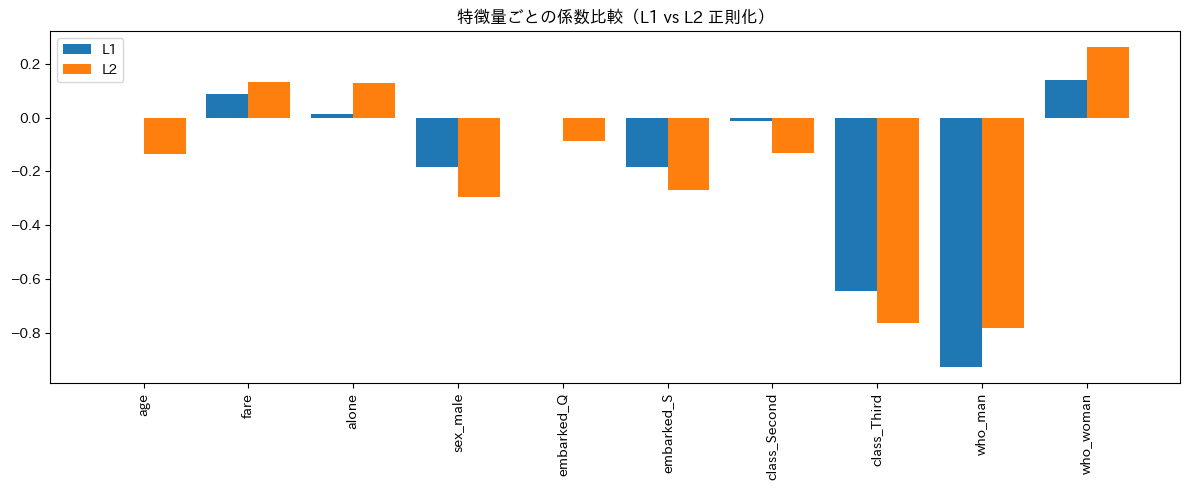

In [ ]:
"""
両モデルの重み（特徴量の重要度）を可視化し、L1正則化によってどの特徴量がゼロにされているかを確認します。
"""

import matplotlib.pyplot as plt
import numpy as np

feature_names = X.columns
coef_l1 = model_l1.coef_[0]
coef_l2 = model_l2.coef_[0]

x = np.arange(len(feature_names))

plt.figure(figsize=(12, 5))
plt.bar(x - 0.2, coef_l1, width=0.4, label='L1')
plt.bar(x + 0.2, coef_l2, width=0.4, label='L2')
plt.xticks(ticks=x, labels=feature_names, rotation=90)
plt.title('特徴量ごとの係数比較（L1 vs L2 正則化）')
plt.legend()
plt.tight_layout()
plt.show()


## 問題2: 逐次特徴選択 (Breast Cancer)
Breast Cancerデータを用い、外れ値除去・標準化後に逐次特徴選択で最適な特徴量を選びます。

### ステップ0: データ読み込みと基本情報の確認

In [ ]:
"""
Breast Cancer データセットを読み込み、基本的な構造と欠損の有無を確認します。
このデータは、がん細胞の特徴量をもとに、悪性（malignant）か良性（benign）かを判別する分類問題です。
"""

from sklearn.datasets import load_breast_cancer
import pandas as pd

# データ読み込み
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 概要表示
print(df.shape)
df.head()


(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 【課題】ステップ1:IQRを使った外れ値の除去

In [ ]:
"""
四分位範囲（IQR）を使って、breast cancer データの中から演習課題と同様の要領で外れ値を見つけて取り除きます。
"""

# target列を除いた特徴量のみを対象に外れ値除去
df_features = df.drop(columns='target')

# 各特徴量についてIQR範囲内かどうかを判定（全てTrueならその行を残す）
condition = pd.Series([True] * len(df), index=df.index)

for col in df_features.columns:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    cond_col = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)
    condition &= cond_col

# 外れ値を除外したデータフレームを作成
df_iqr = df[condition]

# 結果の表示
print(f'元のデータ数: {len(df)}')
print(f'外れ値除去後のデータ数: {len(df_iqr)}')
print(f'除去されたデータ数: {len(df) - len(df_iqr)}')

# 外れ値を除いたデータを表示（先頭5行）
df_iqr.head()


元のデータ数: 569
外れ値除去後のデータ数: 398
除去されたデータ数: 171


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
10,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,0
11,15.78,17.89,103.6,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480,0
13,15.85,23.95,103.7,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287,0


### ステップ2: 特徴量と目的変数の分離＋標準化

In [ ]:
"""
目的変数（target）と説明変数を分離し、特徴量を標準化（平均0・標準偏差1）します。
これはロジスティック回帰などの線形モデルで重要な前処理です。
"""

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 説明変数と目的変数を分離
X = df_iqr.drop(columns='target')
y = df_iqr['target']

# 学習用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=56)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 【課題】ステップ3: 逐次後退選択

In [ ]:
"""
逐次後退選択（backward feature elimination）を行い、
ロジスティック回帰で性能が落ちない範囲で、最も影響の小さい特徴量を削除していきます。
あわせて、特徴量選択の前後で精度（accuracy）を比較します。
"""

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score

# モデル定義
model = LogisticRegression(max_iter=10000, solver='liblinear', random_state=42)

# 選択前モデル（全特徴量）
model.fit(X_train_scaled, y_train)
baseline_acc = accuracy_score(y_test, model.predict(X_test_scaled))

# 後退選択（自動で特徴量数を決定）
sfs = SequentialFeatureSelector(model, direction='backward', n_features_to_select='auto')
sfs.fit(X_train_scaled, y_train)

# 選ばれた特徴量インデックスと名前
selected_idx = sfs.get_support(indices=True)
selected_features = X.columns[selected_idx]
print("選ばれた特徴量:")
print(list(selected_features))

# 選択後のデータで再評価
X_train_sel = X_train_scaled[:, selected_idx]
X_test_sel = X_test_scaled[:, selected_idx]
model.fit(X_train_sel, y_train)
selected_acc = accuracy_score(y_test, model.predict(X_test_sel))

# 精度比較
print(f"\n選択前のテスト精度: {baseline_acc:.3f}")
print(f"選択後のテスト精度: {selected_acc:.3f}")


選ばれた特徴量:
['perimeter error', 'area error', 'concavity error', 'concave points error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

選択前のテスト精度: 0.922
選択後のテスト精度: 0.947


## 問題3: ランダムフォレストによる特徴選択
前の設問と同様にBreast Cancerに対してRandomForestで重要特徴量を抽出します。

### 【課題】ステップ0: ランダムフォレスト + 精度比較

In [ ]:
"""
ランダムフォレストで特徴量の重要度を評価し、
上位の特徴量だけでモデルを再学習します。

ロジスティック回帰による逐次後退選択と、モデルの精度（accuracy）を比較します。
"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# ランダムフォレストで学習して特徴量の重要度を取得
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
importances = rf.feature_importances_

# 重要度の高い順に並べ替え
sorted_idx = np.argsort(importances)[::-1]

# ロジスティック回帰で選ばれた数と同じだけ上位の特徴量を選ぶ
n_selected = len(selected_idx)
top_idx = sorted_idx[:n_selected]
top_features = X.columns[top_idx]

print(f"ランダムフォレストで選ばれた上位 {n_selected} 特徴量:")
print(list(top_features))

# ランダムフォレストで選ばれた特徴量のみを使って再学習
X_train_rf = X_train_scaled[:, top_idx]
X_test_rf = X_test_scaled[:, top_idx]

rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_rf, y_train)
y_pred_rf = rf_selected.predict(X_test_rf)
rf_acc = accuracy_score(y_test, y_pred_rf)

# 結果の比較出力（逐次後退選択結果は selected_acc を使う）
print(f"\nロジスティック回帰（逐次後退選択）のaccuracy: {selected_acc:.3f}")
print(f"ランダムフォレスト（特徴重要度選択）のaccuracy: {rf_acc:.3f}")


ランダムフォレストで選ばれた上位 15 特徴量:
['mean concavity', 'worst concave points', 'area error', 'radius error', 'worst radius', 'worst area', 'worst concavity', 'worst compactness', 'worst symmetry', 'concavity error', 'mean concave points', 'mean perimeter', 'worst smoothness', 'mean radius', 'worst perimeter']

ロジスティック回帰（逐次後退選択）のaccuracy: 0.947
ランダムフォレスト（特徴重要度選択）のaccuracy: 0.919


### 【課題】ステップ1: 特徴量の差分出力と重要度の可視化

共通の特徴量:
['area error', 'concavity error', 'worst area', 'worst compactness', 'worst concave points', 'worst concavity', 'worst perimeter', 'worst radius', 'worst smoothness', 'worst symmetry']

ロジスティック回帰にのみ含まれる特徴量:
['concave points error', 'fractal dimension error', 'perimeter error', 'worst fractal dimension', 'worst texture']

ランダムフォレストにのみ含まれる特徴量:
['mean concave points', 'mean concavity', 'mean perimeter', 'mean radius', 'radius error']


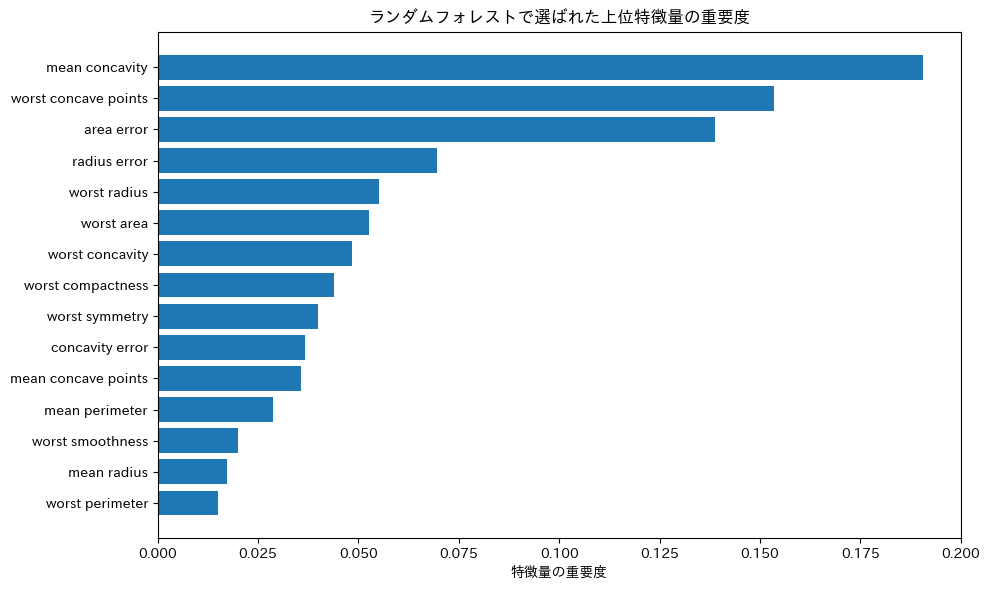

In [ ]:
"""
ロジスティック回帰とランダムフォレストが選んだ特徴量の違いを比較します。
さらに、ランダムフォレストが評価した特徴量重要度を数値と棒グラフで可視化します。
"""

import matplotlib.pyplot as plt

# 1. 特徴量の差分比較
set_lr = set(selected_features)
set_rf = set(top_features)

common = set_lr & set_rf
only_lr = set_lr - set_rf
only_rf = set_rf - set_lr

print("共通の特徴量:")
print(sorted(common))

print("\nロジスティック回帰にのみ含まれる特徴量:")
print(sorted(only_lr))

print("\nランダムフォレストにのみ含まれる特徴量:")
print(sorted(only_rf))


# 2. ランダムフォレストの重要度を表示
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], importances[top_idx][::-1])
plt.xlabel('特徴量の重要度')
plt.title('ランダムフォレストで選ばれた上位特徴量の重要度')
plt.tight_layout()
plt.show()
